In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [2]:
train_df, test_df = pd.read_csv("train.csv"), pd.read_csv("test.csv")
orig_test = pd.read_csv("test.csv")

import pickle
with open("answers.txt","rb") as fp:
    ans_list = pickle.load(fp)

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
id              10000 non-null int64
Total Volume    10000 non-null float64
4046            10000 non-null float64
4225            10000 non-null float64
4770            10000 non-null float64
Total Bags      10000 non-null float64
Small Bags      10000 non-null float64
Large Bags      10000 non-null float64
XLarge Bags     10000 non-null float64
type            10000 non-null int64
year            10000 non-null int64
AveragePrice    10000 non-null float64
dtypes: float64(9), int64(3)
memory usage: 937.6 KB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8249 entries, 0 to 8248
Data columns (total 11 columns):
id              8249 non-null int64
Total Volume    8249 non-null float64
4046            8249 non-null float64
4225            8249 non-null float64
4770            8249 non-null float64
Total Bags      8249 non-null float64
Small Bags      8249 non-null float64
Large Bags      8249 non-null float64
XLarge Bags     8249 non-null float64
type            8249 non-null int64
year            8249 non-null int64
dtypes: float64(8), int64(3)
memory usage: 709.0 KB


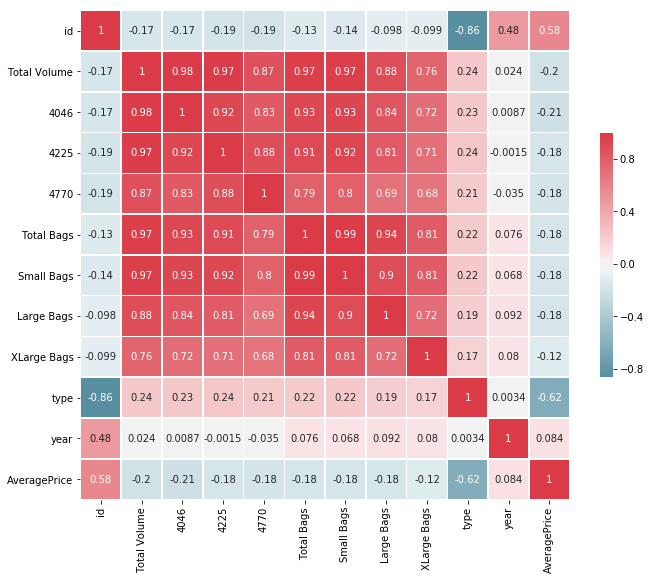

In [5]:
# Compute the correlation matrix
corr = train_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [6]:
train_df_1 = train_df.drop(['type', 'year', 'XLarge Bags', 'Total Bags', 'Total Volume'],1)
test_df_1 = test_df.drop(['type', 'year', 'XLarge Bags', 'Total Bags', 'Total Volume'],1)

In [7]:
X = train_df_1.drop(['AveragePrice'],1)
y = train_df_1['AveragePrice']

In [8]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01, gamma=0, subsample=0.5, reg_lambda = 2,
                           colsample_bytree=1, max_depth=19, n_jobs=4, random_state=42)
"""
kf = KFold(n_splits=5, shuffle=False, random_state=42)

error_sum = 0

for train, test in kf.split(X):
    X_train, X_val = X.loc[train], X.loc[test]
    y_train, y_val = y[train], y[test]
    
    scaler1 = MinMaxScaler()
    scaled_X_train = scaler1.fit_transform(X_train)
    scaled_X_train = pd.DataFrame(scaled_X_train)
    scaled_X_val = scaler1.transform(X_val)
    scaled_X_val = pd.DataFrame(scaled_X_val)
    
    xgb.fit(scaled_X_train, y_train)
    pred = xgb.predict(scaled_X_val)
    error_sum += mean_squared_error(pred, y_val)
    
print(error_sum/5)
"""

'\nkf = KFold(n_splits=5, shuffle=False, random_state=42)\n\nerror_sum = 0\n\nfor train, test in kf.split(X):\n    X_train, X_val = X.loc[train], X.loc[test]\n    y_train, y_val = y[train], y[test]\n    \n    scaler1 = MinMaxScaler()\n    scaled_X_train = scaler1.fit_transform(X_train)\n    scaled_X_train = pd.DataFrame(scaled_X_train)\n    scaled_X_val = scaler1.transform(X_val)\n    scaled_X_val = pd.DataFrame(scaled_X_val)\n    \n    xgb.fit(scaled_X_train, y_train)\n    pred = xgb.predict(scaled_X_val)\n    error_sum += mean_squared_error(pred, y_val)\n    \nprint(error_sum/5)\n'

In [9]:
scaler2 = MinMaxScaler()
scaled_X_train_full = scaler2.fit_transform(X)
scaled_X_train_full = pd.DataFrame(scaled_X_train_full)
scaled_X_test = scaler2.transform(test_df_1)
scaled_X_test = pd.DataFrame(scaled_X_test)

xgb.fit(scaled_X_train_full, y)
pred = xgb.predict(scaled_X_test)

print(mean_squared_error(pred, ans_list))

/home/vader13/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.01925037626493794


In [10]:
"""
res1 = pd.DataFrame(pred)
final = pd.concat([orig_test["id"], res1], axis=1).reindex()
final = final.rename(columns={0: "AveragePrice"})
final.to_csv('sub11.csv', index = False)
"""

'\nres1 = pd.DataFrame(pred)\nfinal = pd.concat([orig_test["id"], res1], axis=1).reindex()\nfinal = final.rename(columns={0: "AveragePrice"})\nfinal.to_csv(\'sub11.csv\', index = False)\n'